# Workshop week 2 Vasil Stamenkoski

In this workshop we will compare all classifiers from the past 2 weeeks that we learned about so far with the diabetes dataset and try to find the best possible model parameters. 
<br><br>
1. Make a 5Fold CV.
<br><br>
2. Fit a dummy classifier.
<br><br>
3. Fit a Gaussian Naive Bayes classifier.
<br><br>
4. Fit a KNN classifier. Do a grid search to find optimal parameters 'n_neighbors' in range of 1 to 50. Once you find optimal K refit a model with those parameters on X_train, y_train.
<br><br>
5. Fit a Decision tree classifier. Find optimal parameter values for 'max_depth' in range of 1 to 10. Once you find optimal max_depth refit a model with those parameters on X_train, y_train.
<br><br>
6. Fit a support vector classifier. Try to find optimal parameter values for the following 3 parameters. For kernel try ['rbf', 'sigmoid'], for the soft margin parameter C try [0.1, 1, 10, 100] and for the gamma parameter try [1,0.1,0.01,0.001] (the gamma parameter defines how far the influence of a single training example reaches). Once you find optimal parameters refit a model with those parameters on X_train, y_train.
<br><br>
7. Fit Random Forest Classifier with default parameters.
<br><br>
8. Fit BaggingClassifier with base_estimator=DecisionTreeClassifier().
<br><br>
9. Fit AdaBoostClassifier with base_estimator=DecisionTreeClassifier().
<br><br>
10. Fit Voting Classifier with 'DecisionTreeClassifier(), SVC(degree=2, kernel='poly') and Gaussian Naive Bayes. (or try your own Vote Classifier)
<br><br>
11. Optional: Try Voting(weighted), Stacking, Boosting algorithm.

<br><br>
12. **Summary:** Compare and discuss the results, compare the f1_score of all the best models on the KFold CV, analyze the classification report. 
<br>
*Note:* Use random_state = 42

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

# For performing train/test/split
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

# import all the models
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# For computing accuracy score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# CONSTANTS AND FLAGS
RANDOM_STATE = 42
N_SPLITS = 5

## Dataset info
<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
<br><br>
Content<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<br><br>
Acknowledgements<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [3]:
# read the dataset
df = pd.read_csv('diabetes.csv')

# drop the unwanted columns
df.drop(['Unnamed: 0', 'id'], axis='columns', inplace=True)

# set our target vector
y = df['class']

# set our feature columns
X = df.drop('class', axis='columns')
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [4]:
# see how balanced our data is
print(y.value_counts())

0    500
1    268
Name: class, dtype: int64


In [5]:
# define our KFold class
kf = StratifiedKFold(n_splits=N_SPLITS, random_state=RANDOM_STATE, shuffle=True)

## Define our baseline models

In [6]:
# DUMMY MODEL
pipeline = Pipeline([('mms', MinMaxScaler()), ('clf', DummyClassifier())])

rez_acc = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(accuracy_score))
print(rez_acc)
print(np.mean(rez_acc))

rez_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(f1_score))
print(rez_f1)
print(np.mean(rez_f1))

[0.64935065 0.64935065 0.64935065 0.65359477 0.65359477]
0.6510482981071216
[0. 0. 0. 0. 0.]
0.0


In [7]:
# BASELINE MODEL
pipeline = Pipeline([('mms', MinMaxScaler()), ('clf', DummyClassifier())])

rez_acc = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(accuracy_score))
print(rez_acc)
print(np.mean(rez_acc))

rez_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(f1_score))
print(rez_f1)
print(np.mean(rez_f1))


[0.64935065 0.64935065 0.64935065 0.65359477 0.65359477]
0.6510482981071216
[0. 0. 0. 0. 0.]
0.0


## Define our model

In [8]:
pipeline = Pipeline([('mms', MinMaxScaler()), ('clf', RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini', max_samples=0.67, random_state=RANDOM_STATE))])

rez_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring=make_scorer(f1_score))
print(rez_f1)
print(np.mean(rez_f1))

[0.65979381 0.67326733 0.65306122 0.59793814 0.62135922]
0.6410839466572653


In [9]:
##Fit a KNN classifier. Do a grid search to find optimal parameters 'n_neighbors' in range of 1 to 50. 
#Once you find optimal K refit a model with those parameters on X_train, y_train.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {'n_neighbors': range(1, 51)}

# Perform grid search with 5-fold cross validation
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

# Find the optimal number of neighbors
optimal_k = grid.best_params_['n_neighbors']

# Refit the model with optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Print the accuracy score on the training data
print('Accuracy on training data:', knn.score(X_train, y_train))




NameError: name 'X_train' is not defined

In [ ]:
##Fit same model ffrom above with pipeline
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipe = Pipeline([('knn', KNeighborsClassifier())])

# Create a dictionary of parameters to search over
param_grid = {'knn__n_neighbors': range(1,51)}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors found
print(grid_search.best_params_)

# Access the best estimator
best_model = grid_search.best_estimator_

# Print the accuracy score on the training data
print('Accuracy on training data:', knn.score(X_train, y_train))

{'knn__n_neighbors': 8}
Accuracy on training data: 0.7768729641693811


In [ ]:
#5. Fit a Decision tree classifier. Find optimal parameter values for 'max_depth' in range of 1 to 10. 
#Once you find optimal max_depth refit a model with those parameters on X_train, y_train.

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Specify the parameter grid for max_depth
param_grid = {'max_depth': range(1, 11)}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the optimal max_depth value
print("Optimal max_depth value: ", grid_search.best_params_)

# Create the Decision Tree classifier with optimal max_depth
dt = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])

# Fit the Decision Tree classifier to the training data
dt.fit(X_train, y_train)

print('Accuracy on training data:', dt.score(X_train, y_train))

Optimal max_depth value:  {'max_depth': 3}
Accuracy on training data: 0.7768729641693811


In [ ]:
#5. Fit a Decision tree classifier. Find optimal parameter values for 'max_depth' in range of 1 to 10. 
#Once you find optimal max_depth refit a model with those parameters on X_train, y_train with pipeline

# Initialize the decision tree classifier with the optimal max_depth
dt = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])

# Create a pipeline with the decision tree classifier
pipe = Pipeline([('dt', dt)])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=3))])

In [ ]:
#Fit a support vector classifier. Try to find optimal parameter values for the following 3 parameters. 
#For kernel try ['rbf', 'sigmoid'], for the soft margin parameter C try [0.1, 1, 10, 100] and for the gamma parameter try [1,0.1,0.01,0.001].
# Once you find optimal parameters refit a model with those parameters on X_train, y_train



# Define the model
svc = SVC()

# Define the parameter grid to search
param_grid = {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Perform grid search with 5-fold cross validation
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

# Find the optimal parameters
optimal_kernel = grid.best_params_['kernel']
optimal_C = grid.best_params_['C']
optimal_gamma = grid.best_params_['gamma']

# Refit the model with optimal parameters
svc = SVC(kernel=optimal_kernel, C=optimal_C, gamma=optimal_gamma)
svc.fit(X_train, y_train)

# Print the accuracy score on the training data
print('Accuracy on training data:', svc.score(X_train, y_train))




Accuracy on training data: 0.8550488599348535


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_leaf_nodes=None)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
from sklearn import metrics
print("Accuracy for Random Forest is:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy for Random Forest is: 0.7727272727272727


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
accuracy_score(y_train, classifier_rf.predict(X_train))

0.9055374592833876

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[83, 16],
       [19, 36]], dtype=int64)

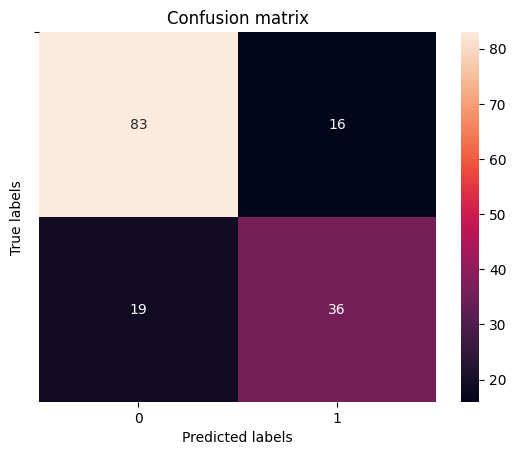

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")

plt.yticks(np.arange(1))
plt.ylabel('True labels');
plt.xlabel('Predicted labels');
plt.title('Confusion matrix');

In [ ]:
print('Precision_score is:', metrics.precision_score(y_test, y_pred_rf, pos_label=0))
print('recall_score is:', metrics.recall_score(y_test, y_pred_rf, pos_label=0))
print('f1_score_micro is:', metrics.f1_score(y_test, y_pred_rf, average='micro'))
print('f1_score_weighted is:', metrics.f1_score(y_test, y_pred_rf, average='weighted'))

Precision_score is: 0.8137254901960784
recall_score is: 0.8383838383838383
f1_score_micro is: 0.7727272727272727
f1_score_weighted is: 0.7712372715859953


In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)


In [ ]:
model1 = abc.fit(X_train, y_train)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
print("AdaBoost Classifier Model Accuracy is:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy is: 0.7337662337662337


In [ ]:
svc=SVC(probability=True, kernel='linear')

In [ ]:
abc =AdaBoostClassifier(n_estimators=50,estimator=svc,learning_rate=1, random_state=0)


In [ ]:
model2 = abc.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.6428571428571429


In [ ]:
from sklearn import model_selection
seed = 8
kfold = model_selection.KFold(n_splits = 3,random_state = seed,shuffle=True)
 
# initialize the base classifier
base_cls = DecisionTreeClassifier()
 
# no. of base classifier
num_trees = 500
 
# bagging classifier
model = BaggingClassifier(estimator = base_cls,n_estimators = num_trees,random_state = seed)
 
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print("Model Accuracy with Bagging Clasifier is:")
print(results.mean())

Model Accuracy with Bagging Clasifier is:
0.7643229166666666


In [ ]:
###Voting dt & Gaus & svc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Define individual classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(degree=2, kernel='poly', probability=True, random_state=42)
gnb_clf = GaussianNB()

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('svc', svc_clf), ('gnb', gnb_clf)], voting='hard')

# Fit the voting classifier to your training data
voting_clf.fit(X_train, y_train)

#Make prediction
y_pred = voting_clf.predict(X_test)

#Calculate acc
acc = accuracy_score(y_test,y_pred)

#print acc of voting clf
print("Accuracy of the voting classifier: {:.2f}%".format(acc * 100))


Accuracy of the voting classifier: 79.87%


In [ ]:
###Voting dt & Gaus & svc & lr
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs',  multi_class ='multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(degree=2, kernel='poly', probability=True, random_state=42)))
estimator.append(('DTC', DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=42,)))
estimator.append(('GN',GaussianNB()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

Hard Voting Score  0
Soft Voting Score  0


In [ ]:
##Optional task with all the models with accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score

# Define individual classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(degree=2, kernel='poly', probability=True, random_state=42)
gnb_clf = GaussianNB()

# Define the voting classifier with weights
voting_clf_weights = VotingClassifier(estimators=[('dt', dt_clf), ('svc', svc_clf), ('gnb', gnb_clf)], voting='hard',weights=[5, 9, 7])

# Fit the voting classifier to your training data
voting_clf_weights.fit(X_train, y_train)

# Use the voting classifier to make predictions on the test data
y_pred_weights = voting_clf_weights.predict(X_test)

# Calculate the accuracy of the voting classifier
accuracy_weights = accuracy_score(y_test, y_pred_weights)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('dt', dt_clf), ('svc', svc_clf), ('gnb', gnb_clf)], final_estimator=LogisticRegression(random_state=42))

# Fit the stacking classifier to your training data
stacking_clf.fit(X_train, y_train)

# Use the stacking classifier to make predictions on the test data
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate the accuracy of the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Define the boosting classifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the boosting classifier to your training data
boosting_clf.fit(X_train, y_train)

# Use the boosting classifier to make predictions on the test data
y_pred_boosting = boosting_clf.predict(X_test)

# Calculate the accuracy of the boosting classifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)

# Define the boosting classifier
boosting_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=100, random_state=42)

# Fit the boosting classifier to your training data
boosting_clf.fit(X_train, y_train)

# Use the boosting classifier to make predictions on the test data
y_pred_boosting = boosting_clf.predict(X_test)

# Calculate the accuracy of the boosting classifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)


# Print the accuracy of each algorithm
print("Accuracy of the weighted voting classifier: {:.2f}%".format(accuracy_weights * 100))
print("Accuracy of the stacking classifier: {:.2f}%".format(accuracy_stacking * 100))
print("Accuracy of the graadient classifier: {:.2f}%".format(accuracy_boosting * 100))
print("Accuracy of the adaboost classifier: {:.2f}%".format(accuracy_boosting * 100))


Accuracy of the weighted voting classifier: 79.87%
Accuracy of the stacking classifier: 79.22%
Accuracy of the graadient classifier: 74.68%
Accuracy of the adaboost classifier: 74.68%


In [ ]:
##Optional task with all the models with f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score

# Define individual classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(degree=2, kernel='poly', probability=True, random_state=42)
gnb_clf = GaussianNB()

# Define the voting classifier with weights
voting_clf_weights = VotingClassifier(estimators=[('dt', dt_clf), ('svc', svc_clf), ('gnb', gnb_clf)], voting='hard',weights=[5, 9, 7])

# Fit the voting classifier to your training data
voting_clf_weights.fit(X_train, y_train)

# Use the voting classifier to make predictions on the test data
y_pred_weights = voting_clf_weights.predict(X_test)

# Calculate the accuracy of the voting classifier
f1_weights = f1_score(y_test, y_pred_weights)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('dt', dt_clf), ('svc', svc_clf), ('gnb', gnb_clf)], final_estimator=LogisticRegression(random_state=42))

# Fit the stacking classifier to your training data
stacking_clf.fit(X_train, y_train)

# Use the stacking classifier to make predictions on the test data
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate the accuracy of the stacking classifier
f1_stacking = f1_score(y_test, y_pred_stacking)

# Define the boosting classifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the boosting classifier to your training data
boosting_clf.fit(X_train, y_train)

# Use the boosting classifier to make predictions on the test data
y_pred_boosting = boosting_clf.predict(X_test)

# Calculate the accuracy of the boosting classifier
f1_boosting = f1_score(y_test, y_pred_boosting)

# Define the boosting classifier
boosting_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=100, random_state=42)

# Fit the boosting classifier to your training data
boosting_clf.fit(X_train, y_train)

# Use the boosting classifier to make predictions on the test data
y_pred_boosting = boosting_clf.predict(X_test)

# Calculate the accuracy of the boosting classifier
f1_boosting = f1_score(y_test, y_pred_boosting)


# Print the accuracy of each algorithm
print("F1_score of the weighted voting classifier: {:.2f}%".format(f1_weights * 100))
print("F1_score of the stacking classifier: {:.2f}%".format(f1_stacking * 100))
print("F1_score of the graadient classifier: {:.2f}%".format(f1_boosting * 100))
print("F1_score of the adaboost classifier: {:.2f}%".format(f1_boosting * 100))


F1_score of the weighted voting classifier: 69.90%
F1_score of the stacking classifier: 69.23%
F1_score of the graadient classifier: 67.77%
F1_score of the adaboost classifier: 67.77%


In [ ]:
print('Vasil Stamenkoski')

Vasil Stamenkoski
